# [LEGALST-190] Lab 4/3: Neural Nets

In this lab, we'll learn how to implement neural net methods to pattern recognize handwriting images.


*Estimated Time: 30-40 minutes*

---
### Table of Contents

[The Data](#section data)<br>

1 - [Visualizing Data](#section 1)<br>

2 - [Neural Network](#section 2)<br>

3 - [Multi-Layer Perceptrons](#section 3)<br>

4 - [A Simple MLP](#section 4)<br>

5 - [Convolutional Nerual Networks](#section 5)<br>

**Dependencies:**

In [ ]:
# !conda install -c tensorflow keras

Solving environment: done

## Package Plan ##

  environment location: /Users/jmarshall/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.7.0              |           py36_0         156 KB
    astor-0.7.1                |           py36_0          43 KB
    c-ares-1.15.0              |       h1de35cc_1          81 KB
    conda-4.6.12               |           py36_1         2.1 MB
    gast-0.2.2                 |           py36_0         138 KB
    grpcio-1.16.1              |   py36h044775b_1         944 KB
    keras-2.2.4                |                0           5 KB
    keras-applications-1.0.7   |             py_0          33 KB
    keras-base-2.2.4           |           py36_0         457 KB
    keras-preprocessing-1.0.9  |             py_0          35 KB
   

---

## The Data <a id='data'></a>

In this notebook, you'll be working with the MNIST handwriting dataset, considered "hello, world" of object recognition in machine learning. It contains images of handwritten digits centered and normalized. Modified NIST (National Institute of Standards and Technology) is constructed from scanned documents available from NIST. 

---

## Visualizing Data  <a id='section 1'></a>

The Keras deep learning library provides a convenience method for loading the MNIST dataset.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 1us/step


As you can see above, the dataset is split into a set to train our model and one to test it. X_train and X_test are inputs while y_train and y_test are outputs.

Let's visualize MNIST dataset by running the cell below.

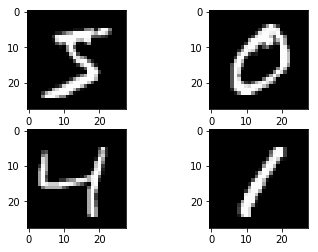

In [2]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

---

## Neural Network <a id='section 2'></a>

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns.

Neural networks help us cluster and classify. They group unlabeled data according to similarities among the example inputs.

Classification problems depend on labeled datasets, i.e. humans need to label the data for a neural to learn the correlation between labels and data. This is <i>supervised learning</i>. Below, we'll dive into MLP, which utilizes a supervised learning technique.

## Multi-Layer Perceptrons <a id='section 3'></a>

A multi-layer perceptron (MLP) is a class of neural network that consists of at least three layers of nodes (first layer being inputs and last layer being outputs). Except for the input layer, activation of nodes of a certain layer depends on which nodes are activated in the previous layer. Each node is a neuron that uses a nonlinear activation function. Below is an image that represents a MLP.

<img src="https://www.safaribooksonline.com/library/view/getting-started-with/9781786468574/graphics/B05474_04_05.jpg" style="width: 500px;"/>

### MLP

A multilayer perceptron (MLP) is a deep, artificial neural network. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP

MLPs train on a set of input-output pairs and learn to model the correlation between those inputs and outputs by adjusting parameters to minimize error.

## A Simple MLP <a id='section 4'></a>

Let's try to build a simple MLP to identify digits.

### Input vs. Output

Each pixel of an image will be an input to our MLP.

<b>Question:</b> How many nodes would our MLP's first layer have for a 20x20 image?

<i>Your answer here</i>  <b>Answer: 400</b>

The output layer will produce what we are looking for.

<b>Question:</b> What will each node in the output layer represent?

<i>Your answer here</i> <b>Answer: Each node represents a digit from 0-9</b>

### Fixing MNIST

The training dataset is a 3-D array of instance, image width, image height. To make an image "inputable" to our MLP, we need to vectorize the representations of MNIST training dataset, i.e. we need to flatten a image into a vector.

In [3]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [4]:
# NumPy's reshape function can help flatten multi-dimensional arrays
# As all images are 28x28 pixels, we flatten all into vectors of length 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

The pixel values are grey scale, which ranges from 0-255. Neural network models work better with normalized inputs. Thus, normalize our training dataset below.

In [5]:
X_train = X_train / 255
X_test = X_test / 255

The outputs (y_train and y_test) are integers from 0 to 9 and we can think fo each integer as a class. We'll use a one-hot encoding of the class values, which transforms the output vector into a binary matrix.

<i>One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.</i>

In [6]:
# use built-in function in np_utils
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Just to make sure that we still have 10 classes(0-9) after one-hot encoding.

In [7]:
num_classes = y_test.shape[1]
num_classes

10

### Create the Model

Keras has useful methods we can utilize to develop an MLP.

In [8]:
# importing the methods we need
from keras.models import Sequential
from keras.layers import Dense

Create an empty MLP, i.e. empty linear stack of layers

In [9]:
model = Sequential()

Create an input layer using the Dense function (refer to <a href="https://keras.io/layers/core/">this doc</a>), then add the layer to our model using `model.add(...)`. The input layer should use 'relu' activation, a 'normal' kernel_initializer, and the number of pixels for input_dim. 

In [10]:
"""
Dense(...) creates a regular densely connected layer. 
relu is a rectifier activation function.
"""
model.add(
    Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')
)

Instructions for updating:
Colocations handled automatically by placer.


Add in the output layer to our model.

In [11]:
"""
A softmax activation function is used on the output layer to turn the outputs into 
probability-like values
"""
model.add(
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
)

Compile our model

In [12]:
"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's now fit our model on the training dataset. We fit our model over 10 epochs and update it every 200 images. It might take a few minutes.

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2806 - acc: 0.9202 - val_loss: 0.1381 - val_acc: 0.9601
Epoch 2/10
 - 11s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0930 - val_acc: 0.9725
Epoch 3/10
 - 11s - loss: 0.0709 - acc: 0.9791 - val_loss: 0.0836 - val_acc: 0.9737
Epoch 4/10
 - 11s - loss: 0.0496 - acc: 0.9859 - val_loss: 0.0743 - val_acc: 0.9771
Epoch 5/10
 - 11s - loss: 0.0369 - acc: 0.9896 - val_loss: 0.0709 - val_acc: 0.9783
Epoch 6/10
 - 12s - loss: 0.0281 - acc: 0.9919 - val_loss: 0.0721 - val_acc: 0.9773
Epoch 7/10
 - 11s - loss: 0.0213 - acc: 0.9944 - val_loss: 0.0670 - val_acc: 0.9796
Epoch 8/10
 - 11s - loss: 0.0145 - acc: 0.9966 - val_loss: 0.0600 - val_acc: 0.9810
Epoch 9/10
 - 11s - loss: 0.0116 - acc: 0.9974 - val_loss: 0.0682 - val_acc: 0.9792
Epoch 10/10
 - 11s - loss: 0.0083 - acc: 0.9984 - val_loss: 0.0617 - val_acc: 0.9820


Comparing the log of our training produced above, what can you conclude?

<i>Your Answer Here</i>  **__It looks like the accuracy of the classifier improves rapidly after the first couple of iterations but then is about as accurate as it gets. Does it always converge after 8 or so iterations?__**

Let's evaluate our model on the test dataset.

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 1.80%


## Convolutional Neural Networks <a id='section 5'></a>

MLPs did give us pretty good accuracy. However, As each pixel of an image is an input, we will have too many inputs for a large image. Convolutional neural nets, on the other hand, can take in 3-D inputs (2D + color) instead of just 1-D.

### How a CNN works <a id='conv_image'></a>

<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg" style="width: 600px;"/>

#### Filtering

ConvNets have "features" and match them with parts of an image rather than the whole thing. 

<img src="./imgs/match_pieces.png" style="width: 500px;"/>

In the example above, we have three features: left-to-right diagonal, central X, and right to left diagonal. To match features, we use a process called filtering.

1. Assign each black pixel -1 and each white pixel 1. 
2. Line up a feature with an image patch (for example, line up left-to-right diagonal with the green box above)
3. Multiply each feature pixel with the corresponding image patch pixel
4. Take the average of the products

<b>Question:</b> In the example above when we match the left-to-right diagonal feature with the green box, what would the process output?

<i>Your Answer Here</i> <b>Answer: 1</b>

#### Convolutional Layer
 
The process of filtering for every possible image patch with every feature.

<img src="./imgs/convolution.png" style="width: 500px;"/>

As you can see in the image above, after applying our left-to-right diagonal filter, we get higher scores on the left to right diagonal.

<b>Question:</b> If we apply the central X filter in this example, where will the highest score occur?

<i>Your Answer Here</i> <b>Answer: The very center of the entire image</b>

#### ReLU (Rectified Linear Units)

This process is applied on filtered images. It simply changes every negative value to 0 and leaves positive values unchanged.

#### Pooling Layer

In this layer, we shrink the filtered images by the following process:
1. Pick a window size and a stride size
2. Walk our window on the filtered image, each time shifting by the stride size
3. For each step, take the maximum score contained in the window

<img src="./imgs/pooling.png" style="width: 500px;"/>

This layer helps because it does not care about where in the window the maximum value occurs, i.e. it's less sensitive to specific positioning of pixels.

<b>Question:</b> How would the pooling layer help in classifying digits? 

<i>Your Answer Here</i> <b>Answer: Handwritten digits follow a general pattern but where each pixel lands can be undeterminstic. Matching parts of an image can tell us which general pattern occurs without caring too much about where it occurs.</b>

#### Fully Connected Layer

This layer flattens the pooled images and each value gets a vote, which is how strongly that value suggests a certain outcome.

One question you might have now is where do the initial features and voting weights come from. They are obtained by a process called <a href="https://brilliant.org/wiki/backpropagation/">backpropragation</a>, which we don't have enough time to explain here.

Now we've learned that the layers are combined together: <b>convolutional + ReLU + pooling</b> constitute the first part while <b>fully connected</b> the second. One note is that each part can be applied multiple times, as we can see in [the overview of a CNN at the beginning](#conv_image).

### Create a CNN

Keras also provides useful methods to create a CNN.

In [15]:
# importing dependencies
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height]. We'll set the pixels dimension to 1 because the pixel values in MNIST are gray scale. As a reminder, all images in MNIST are 28x28.

In [16]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Below, fill out the blanks to normalize the datasets and one hot encode the output values.

In [17]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Let's define a function that creates our CNN. Read through the comments to understand what each line does.

In [18]:
def CNN_model():
    # create model
    model = Sequential()
    
    # A convolutional layer that has 32 features of size 5x5
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    
    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.2))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model = CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 95s - loss: 0.2404 - acc: 0.9314 - val_loss: 0.0785 - val_acc: 0.9762
Epoch 2/10
 - 89s - loss: 0.0755 - acc: 0.9778 - val_loss: 0.0507 - val_acc: 0.9841
Epoch 3/10
 - 87s - loss: 0.0542 - acc: 0.9835 - val_loss: 0.0414 - val_acc: 0.9858
Epoch 4/10
 - 88s - loss: 0.0425 - acc: 0.9869 - val_loss: 0.0381 - val_acc: 0.9868
Epoch 5/10
 - 87s - loss: 0.0336 - acc: 0.9900 - val_loss: 0.0332 - val_acc: 0.9882
Epoch 6/10
 - 95s - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0345 - val_acc: 0.9883
Epoch 7/10
 - 89s - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0294 - val_acc: 0.9890
Epoch 8/10
 - 91s - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0346 - val_acc: 0.9883
Epoch 9/10
 - 92s - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0310 - val_acc: 0.9900
Epoch 10/10
 - 95s - loss: 0.0141 - acc: 0.9955 - val_loss: 0.0333 - val_acc: 0

Now let's experiment with the parameters: number of features, size of features, size of the window in pooling, dropout percentage, and so on. Modify the parameters to your best judgment in the function below.

In [22]:
def diff_CNN_model():
    # create model
    model = Sequential()
    
    # A convolutional layer that has 16 features of size 5x5
    model.add(Conv2D(16, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    
    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.2))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
model = diff_CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 54s - loss: 0.2879 - acc: 0.9197 - val_loss: 0.0950 - val_acc: 0.9727
Epoch 2/10
 - 49s - loss: 0.0911 - acc: 0.9737 - val_loss: 0.0597 - val_acc: 0.9810
Epoch 3/10
 - 49s - loss: 0.0629 - acc: 0.9813 - val_loss: 0.0470 - val_acc: 0.9845
Epoch 4/10
 - 50s - loss: 0.0510 - acc: 0.9844 - val_loss: 0.0422 - val_acc: 0.9860
Epoch 5/10
 - 48s - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 6/10
 - 47s - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0337 - val_acc: 0.9892
Epoch 7/10
 - 50s - loss: 0.0300 - acc: 0.9904 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 8/10
 - 51s - loss: 0.0257 - acc: 0.9915 - val_loss: 0.0313 - val_acc: 0.9903
Epoch 9/10
 - 51s - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0319 - val_acc: 0.9913
Epoch 10/10
 - 55s - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0330 - val_acc: 0.9894
CNN Error: 1.06%


Do you get different accuracies for the two different models? Make some conclusions about different parameters.

<i>Your Answer Here</i> <b>Allowing fewer features in the convolutional layer sped the algorithm up and didn't make that much difference in terms of accuracy--the error rate was still about 1%. My guess is that you could make it considerably less computationally intensive before the error rate started rising, and that if you added more features or anything else you would not make it much more accurate.</b>

In [28]:
def more_diff_CNN_model():
    # create model
    model = Sequential()
    
    # A convolutional layer that has 16 features of size 6x6
    model.add(Conv2D(16, (6, 6), input_shape=(1, 28, 28), activation='relu'))
    
    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.2))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
model = more_diff_CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 51s - loss: 0.3091 - acc: 0.9120 - val_loss: 0.1045 - val_acc: 0.9690
Epoch 2/10
 - 50s - loss: 0.0965 - acc: 0.9712 - val_loss: 0.0596 - val_acc: 0.9814
Epoch 3/10
 - 50s - loss: 0.0676 - acc: 0.9789 - val_loss: 0.0499 - val_acc: 0.9832
Epoch 4/10
 - 51s - loss: 0.0529 - acc: 0.9835 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 5/10
 - 47s - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0400 - val_acc: 0.9869
Epoch 6/10
 - 52s - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0344 - val_acc: 0.9879
Epoch 7/10
 - 52s - loss: 0.0311 - acc: 0.9900 - val_loss: 0.0333 - val_acc: 0.9884
Epoch 8/10
 - 48s - loss: 0.0284 - acc: 0.9904 - val_loss: 0.0350 - val_acc: 0.9879
Epoch 9/10
 - 50s - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0356 - val_acc: 0.9889
Epoch 10/10
 - 50s - loss: 0.0225 - acc: 0.9929 - val_loss: 0.0315 - val_acc: 0.9897
CNN Error: 1.03%


### Bibliography

Image source:
- How Convolutional Neural Networks work, https://www.youtube.com/watch?v=FmpDIaiMIeA&t=1070s

Code source:
- Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras, https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

---
Notebook developed by: Tian Qin

Data Science Modules: http://data.berkeley.edu/education/modules
